In [1]:
using Interpolations
using NPZ
using Plots
using PyPlot 
import PyPlot

In [2]:
using PyCall

In [8]:
using Statistics

In [3]:
pxr = pyimport("pixie_read_st")

PyObject <module 'pixie_read_st' from '/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [12]:
implib = pyimport("importlib")

PyObject <module 'importlib' from '/usr/projects/hpcsoft/toss3/common/x86_64/anaconda/5.0.1-python-3.6/lib/python3.6/importlib/__init__.py'>

In [13]:
implib.reload(pxr)

PyObject <module 'pixie_read_st' from '/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [4]:
filepath = "/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth2.scratch/pixie3d.h5"

"/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth2.scratch/pixie3d.h5"

In [14]:
pxr.pixieload(filepath)

In [6]:
B1 = pxr.load_array(1,0,680,682);
B2 = pxr.load_array(1,1,680,682);
B3 = pxr.load_array(1,2,680,682);

In [9]:
B1t = dropdims(mean(B1,dims=3),dims=3);
B2t = dropdims(mean(B2,dims=3),dims=3);
B3t = dropdims(mean(B3,dims=3),dims=3);

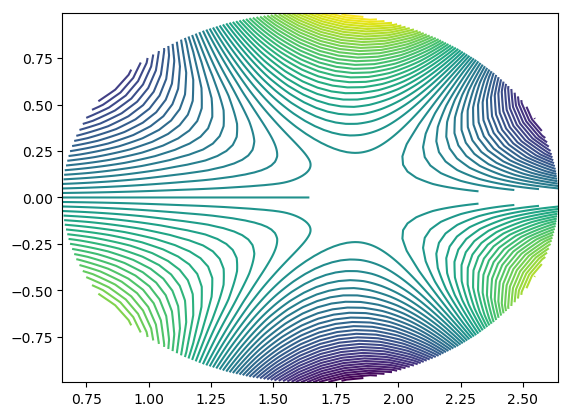

In [19]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],B1[:,:,1,1],60)
PyPlot.show()

In [20]:
# definitions of cell grid
num_r_cells = size(B3)[1];
num_u_cells = size(B3)[2];
num_phi_cells = size(B3)[3];
dn_r = (1.0/num_r_cells);
dn_u = ((2.0*pi)/num_u_cells);

# Cell-based grid
rc = LinRange(0.0+(dn_r/2.0),1.0-(dn_r/2.0),num_r_cells);
uc = LinRange(0.0+(dn_u/2.0),2.0*pi-(dn_u/2.0),num_u_cells);
phic = LinRange(0.0+(dn_u/2.0),2.0*pi-(dn_u/2.0),num_phi_cells);
tn = LinRange(0, size(B3)[4]-1,size(B3)[4]);

# Node-based grid
rn = LinRange(0.0,1.0,(num_r_cells+1));
un = LinRange(0.0,2.0*pi,(num_u_cells+1));
phin = LinRange(0.0,2.0*pi,(num_phi_cells+1));

# Node-based grid dimensions
rdim = (num_r_cells+1);
udim = (num_u_cells+1);
fidim = (num_phi_cells+1);
tdim = size(B3)[4];
psidim = 101;
ufdim = udim; # ufdim same as udim to avoid aliasing

In [21]:
B1_int = Interpolations.interpolate(B1,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B1_sint = scale(B1_int,rc,uc,phic,tn);
B1_eint = extrapolate(B1_sint, (Line(),Periodic(),Periodic(),Line()));
B1N = B1_eint(rn,un,phin,tn);

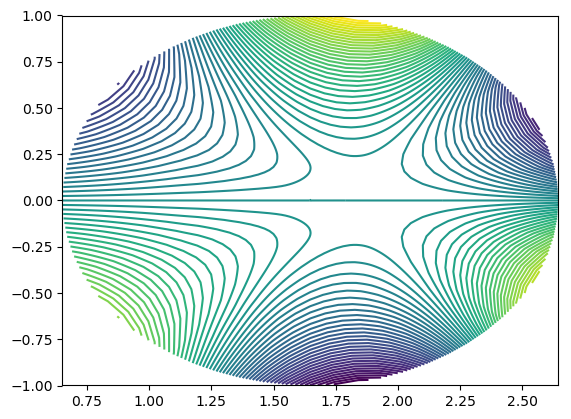

In [43]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],B1N[:,:,1,1],60)
#PyPlot.xlim(1.55,1.75)
#PyPlot.ylim(-0.2,0.2)
PyPlot.show()

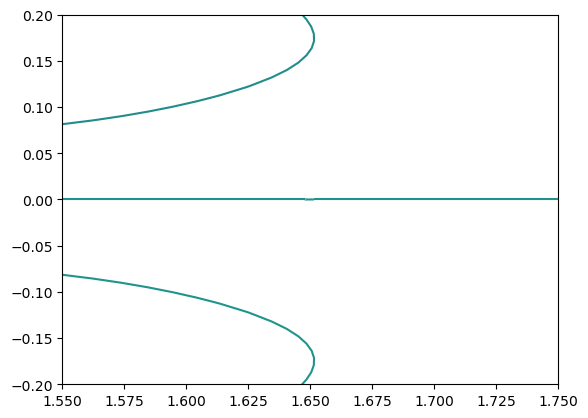

In [41]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],-dpsidtheta[:,:,1,1],60)
PyPlot.xlim(1.55,1.75)
PyPlot.ylim(-0.2,0.2)
PyPlot.show()

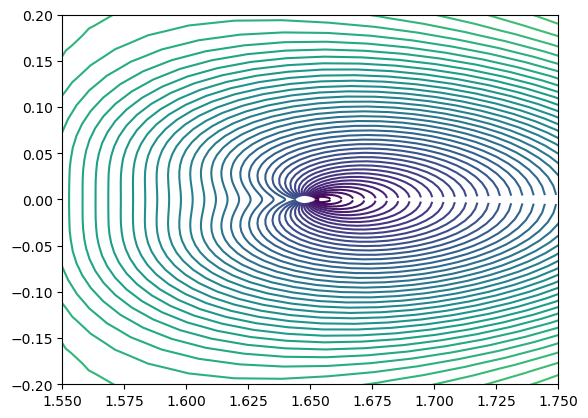

In [29]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],B2[:,:,1,1],60)
PyPlot.xlim(1.55,1.75)
PyPlot.ylim(-0.2,0.2)
PyPlot.show()

In [25]:
B2_int = Interpolations.interpolate(B2,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B2_sint = scale(B2_int,rc,uc,phic,tn);
B2_eint = extrapolate(B2_sint, (Line(),Periodic(),Periodic(),Line()));
B2N = B2_eint(rn,un,phin,tn);

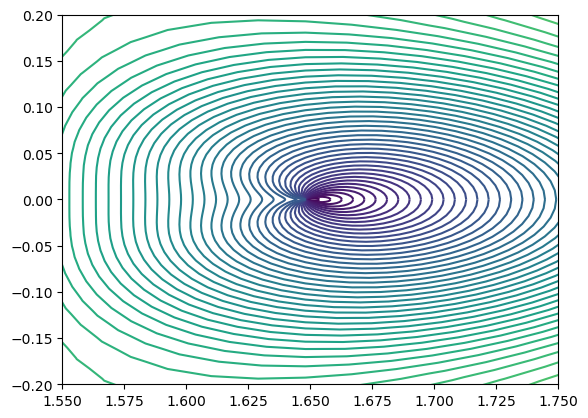

In [27]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],B2N[:,:,1,1],60)
PyPlot.xlim(1.55,1.75)
PyPlot.ylim(-0.2,0.2)
PyPlot.show()

In [31]:
psi = pxr.load_array(3,4,680,682);

In [32]:
psi=-psi;

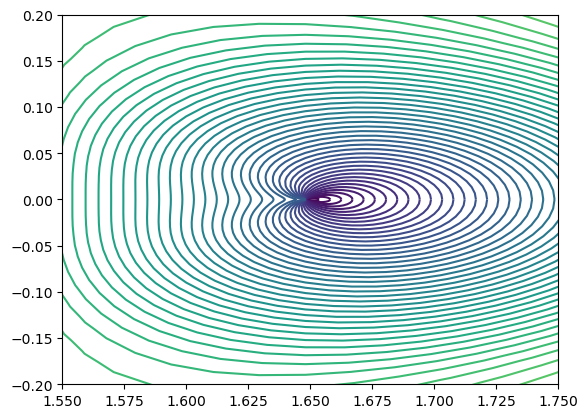

In [37]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],dpsidr[:,:,1,1],60)
PyPlot.xlim(1.55,1.75)
PyPlot.ylim(-0.2,0.2)
PyPlot.show()

In [38]:
B2Ns = B2_sint(rn,un,phin,tn);

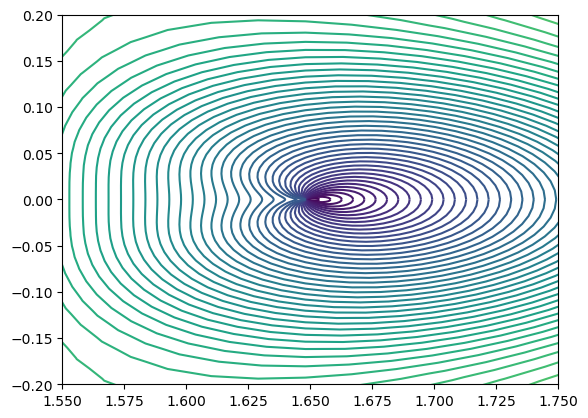

In [39]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],B2Ns[:,:,1,1],60)
PyPlot.xlim(1.55,1.75)
PyPlot.ylim(-0.2,0.2)
PyPlot.show()

In [33]:
function dAdr(arr::Array{Float64,4},theta::Int,phi::Int,t::Int)
    dr = 1.0 / size(arr,1)
    p = arr[:,theta,phi,t]
    if theta<33
        mid = theta + convert(Int,(size(arr,2)-1)/2)
    else
        mid = theta - convert(Int,(size(arr,2)-1)/2)
    end
    p_pi = arr[:,mid,phi,t]
    L = length(p)
    dpsidr = zeros(L)
    for i in range(1,stop=L)
        if i==1
            dpsidr[i] = (-p[3]+8*p[2]-8*p_pi[2]+p_pi[3])/(12.0*dr)
        elseif i==2
            dpsidr[i] = (-p[4]+8*p[3]-8*p[1]+p_pi[2])/(12.0*dr)
        elseif i==L-1
            dpsidr[i] = (p[L]-p[L-2])/(2.0*dr)
        elseif i==L-2 
            dpsidr[i] = (-p[L]+8*p[L-1]-8*p[L-3]+p[L-4])/(12.0*dr)
        elseif i==L
            dpsidr[i] = (p[L]-p[L-1])/dr
        else
            dpsidr[i] = (-p[i+2]+8*p[i+1]-8*p[i-1]+p[i-2])/(12.0*dr)
        end
    end
    return dpsidr
end

function dAdt(arr::Array{Float64,4},r::Int,phi::Int,t::Int)
    dtheta = 2.0*pi / size(arr,2)
    p = arr[r,:,phi,t]
    L = length(p)
    dpsidtheta = zeros(L)
    for i in range(1,stop=L)
        if i==1
            dpsidtheta[i] = (-p[3]+8*p[2]-8*p[L-1]+p[L-2])/(12.0*dtheta)
        elseif i==2
            dpsidtheta[i] = (-p[4]+8*p[3]-8*p[1]+p[L-1])/(12.0*dtheta)
        elseif i==L-1
            dpsidtheta[L-1] = (-p[2]+8*p[1]-8*p[L-2]+p[L-3])/(12.0*dtheta)
        elseif i==L-2
            dpsidtheta[L-2] = (-p[1]+8*p[L-1]-8*p[L-3]+p[L-4])/(12.0*dtheta)
        elseif i==L
            dpsidtheta[L] = dpsidtheta[1]
        else
            dpsidtheta[i] = (-p[i+2]+8*p[i+1]-8*p[i-1]+p[i-2])/(12.0*dtheta)
        end
    end
    return dpsidtheta
end 
    
function dpsi_dr(arr::Array{Float64,4})
    r_deriv = Float64[] 
    for theta in range(1,stop=size(arr,2))
        for phi in range(1,stop=size(arr,3))
            for t in range(1,stop=size(arr,4))
                r_deriv = append!(r_deriv,dAdr(arr,theta,phi,t))
            end
        end
    end
     # In Julia the convention in reshape is the opposite of Python
    return permutedims(reshape(r_deriv,(size(arr,1),size(arr,4),size(arr,3),size(arr,2))),(1,4,3,2))
end

function dpsi_dtheta(arr::Array{Float64,4})
    t_deriv = Float64[] 
    for r in range(1,stop=size(arr,1))
        for phi in range(1,stop=size(arr,3))
            for t in range(1,stop=size(arr,4))
                t_deriv = append!(t_deriv,dAdt(arr,r,phi,t))
            end
        end
    end
    return permutedims(reshape(t_deriv,(size(arr,2),size(arr,4),size(arr,3),size(arr,1))),(4,1,3,2))
end

dpsi_dtheta (generic function with 1 method)

In [34]:
dpsidtheta = dpsi_dtheta(psi);
dpsidr = dpsi_dr(psi);

In [8]:
# Reading the arrays
Xc = npzread(filepath * "Xc.npy");
Zc = npzread(filepath * "Zc.npy");
Xn = npzread(filepath * "Xn.npy");
Zn = npzread(filepath * "Zn.npy");
B3 = npzread(filepath * "B3.npy");
psin = npzread(filepath * "psin.npy");
psic = npzread(filepath * "psic.npy");

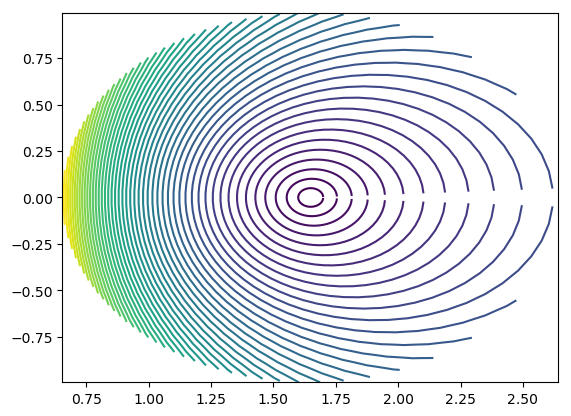

In [5]:
PyPlot.contour(Xc[:,:,1],Zc[:,:,1],B3[:,:,1,1],50)
PyPlot.show()

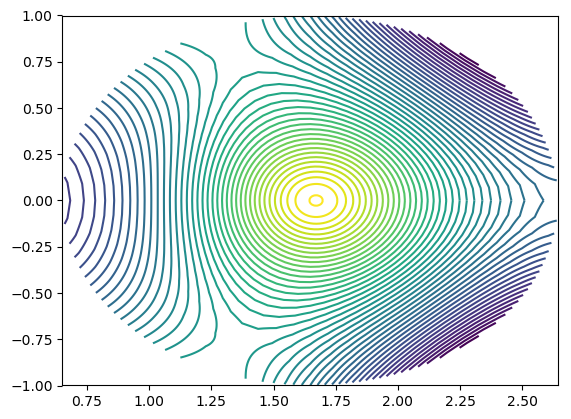

In [6]:
PyPlot.contour(Xn[:,:,1],Zn[:,:,1],psin[:,:,1,1],50)
PyPlot.show()

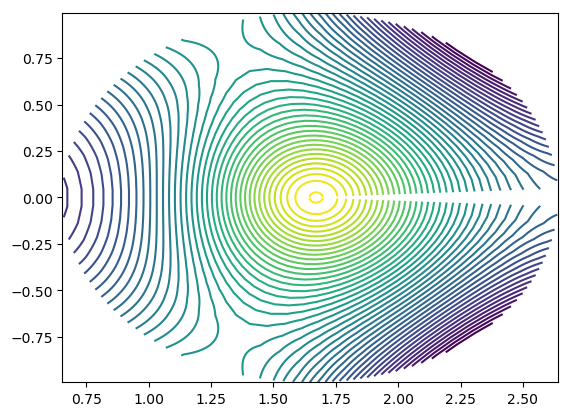

In [8]:
PyPlot.contour(Xc[:,:,1],Zc[:,:,1],psic[:,:,1,1],50)
PyPlot.show()

In [4]:
Xc_int = interpolate(Xc,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell())))));
Zc_int = interpolate(Zc,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell())))));
B3_int = interpolate(B3,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnGrid())))));
psic_int = interpolate(psic,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnGrid())))));

In [88]:
psicq_int = interpolate(psic,(BSpline(Quadratic(Line(OnCell()))),BSpline(Quadratic(Periodic(OnCell()))),BSpline(Quadratic(Periodic(OnCell()))),BSpline(Quadratic(Periodic(OnGrid())))));

In [10]:
num_r_cells = size(B3)[1];
num_u_cells = size(B3)[2];
num_phi_cells = size(B3)[3];
dn_r = (1.0/num_r_cells);
dn_u = ((2.0*pi)/num_u_cells);

In [11]:
# Cell-based grid
rc = LinRange(0.0+(dn_r/2.0),1.0-(dn_r/2.0),num_r_cells);
uc = LinRange(0.0+(dn_u/2.0),2.0*pi-(dn_u/2.0),num_u_cells);
phic = LinRange(0.0+(dn_u/2.0),2.0*pi-(dn_u/2.0),num_phi_cells);
t = LinRange(0, size(B3)[4],size(B3)[4]);

In [81]:
Xc_sint = scale(Xc_int,rc,uc,phic);
Zc_sint = scale(Zc_int,rc,uc,phic);
B3_sint = scale(B3_int,rc,uc,phic,t);
psic_sint = scale(psic_int,rc,uc,phic,t);

In [89]:
psicq_sint = scale(psicq_int,rc,uc,phic,t);

In [82]:
Xc_eint = extrapolate(Xc_sint,(Line(),Periodic(),Periodic()));
Zc_eint = extrapolate(Zc_sint,(Line(),Periodic(),Periodic()));
B3_eint = extrapolate(B3_sint,(Line(),Periodic(),Periodic(),Line()));
psic_eint = extrapolate(psic_sint,(Line(),Periodic(),Periodic(),Line()));

In [12]:
# Node-based grid
rn = LinRange(0.0,1.0,(num_r_cells+1));
un = LinRange(0.0,2.0*pi,(num_u_cells+1));
phin = LinRange(0.0,2.0*pi,(num_phi_cells+1));

In [75]:
psi_ngrid = psic_eint(rn,un,phin,t);

In [84]:
psi2_ngrid = psic_sint(rn,un,phin,t);

In [90]:
psiq_ngrid = psicq_sint(rn,un,phin,t);

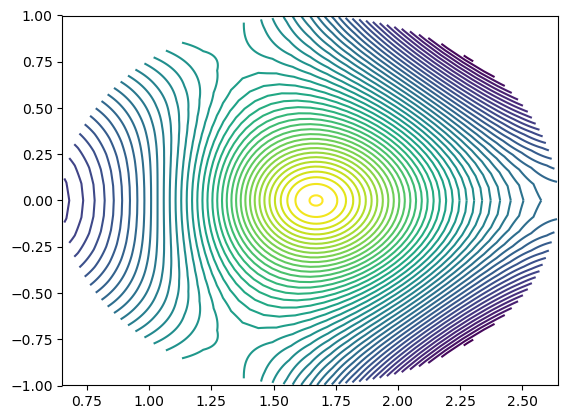

In [76]:
PyPlot.contour(Xn[:,:,1],Zn[:,:,1],psi_ngrid[:,:,1,1],50)
PyPlot.show()

In [77]:
dpsi = psin.-psi_ngrid;

In [78]:
maximum(dpsi)

0.0004989827854171014

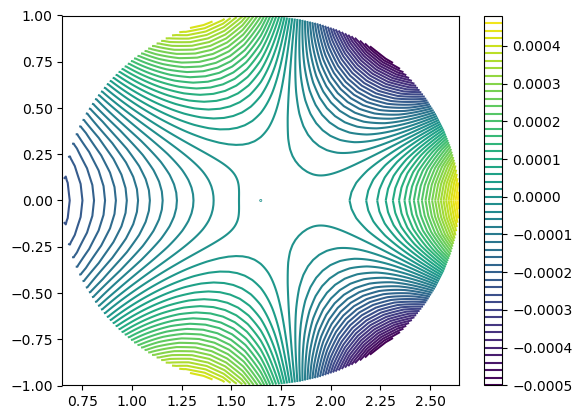

In [106]:
PyPlot.contour(Xn[:,:,1],Zn[:,:,1],dpsi[:,:,1,1],50)
PyPlot.colorbar()
PyPlot.show()

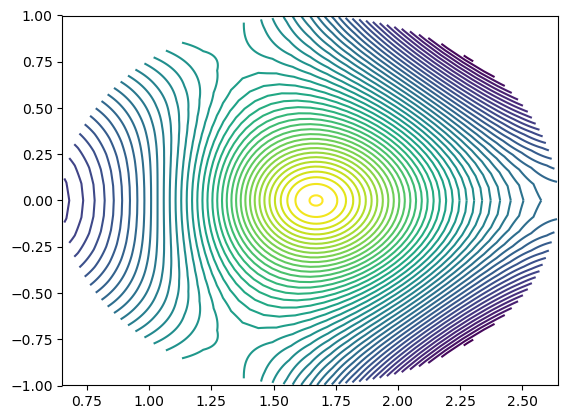

In [85]:
PyPlot.contour(Xn[:,:,1],Zn[:,:,1],psi2_ngrid[:,:,1,1],50)
PyPlot.show()

In [86]:
dpsi2 = psin.-psi2_ngrid;

In [87]:
maximum(dpsi2)

0.0004989827854171014

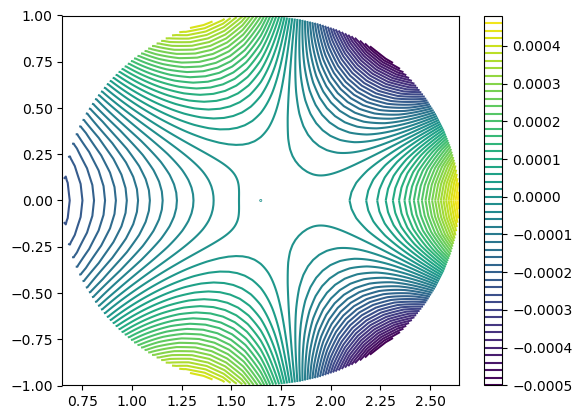

In [107]:
PyPlot.contour(Xn[:,:,1],Zn[:,:,1],dpsi2[:,:,1,1],50)
PyPlot.colorbar()
PyPlot.show()

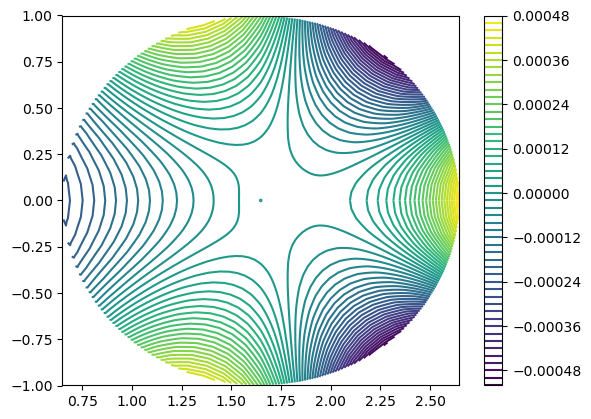

In [108]:
#PyPlot.contour(Xn[:,:,1],Zn[:,:,1],psiq_ngrid[:,:,1,1],50)
#PyPlot.contour(Xn[:,:,1],Zn[:,:,1],psin[:,:,1,1],50)
PyPlot.contour(Xn[:,:,1],Zn[:,:,1],dpsiq[:,:,1,1],50)
#PyPlot.xlim(1.3,2.1)
#PyPlot.ylim(-0.25,0.25)
PyPlot.colorbar()
PyPlot.show()

In [93]:
dpsiq = psin.-psiq_ngrid;

In [94]:
maximum(dpsiq)

0.0004949590784035923

In [95]:
size(psiq_ngrid)

(129, 65, 65, 2)

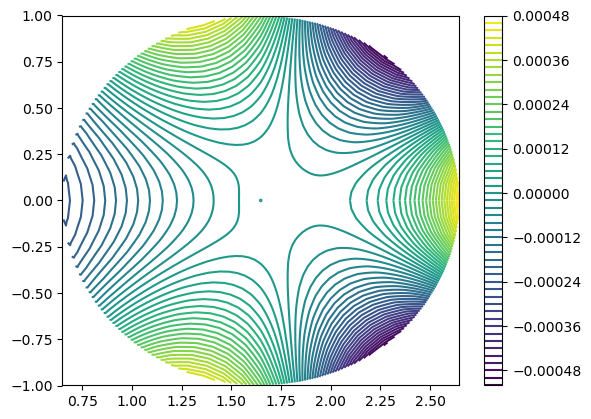

In [97]:
PyPlot.contour(Xn[:,:,1],Zn[:,:,1],dpsiq[:,:,1,1],50)
PyPlot.colorbar()
PyPlot.show()

In [42]:
B3_ngrid = B3_eint(rn,un,phin,t);

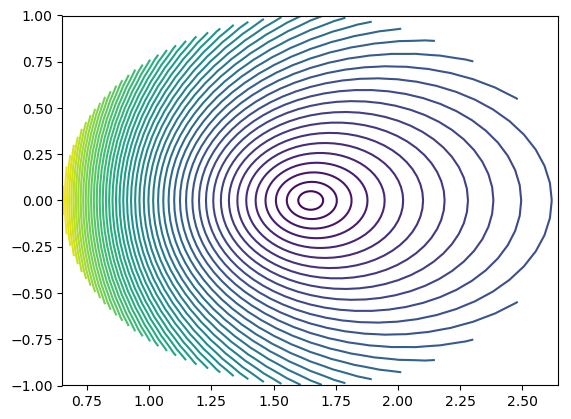

In [43]:
PyPlot.contour(Xn[:,:,1],Zn[:,:,1],B3_ngrid[:,:,1,1],50)
PyPlot.show()

Check the B1, B2 behavior and make them node-based. 
Switch over to python to do the normalization with a

## Compare with the python interpolation

In [3]:
psitest = npzread("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_start.npy");

In [4]:
size(psitest)

(129, 65, 65, 26)

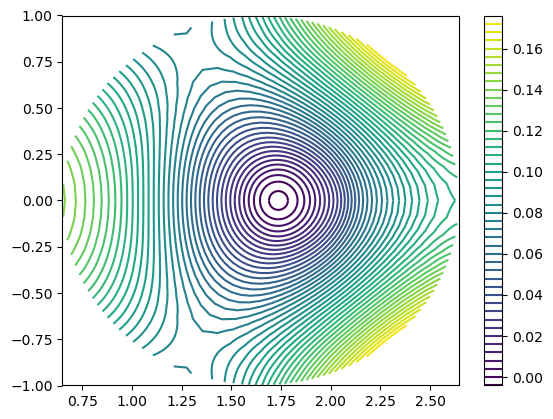

In [9]:
PyPlot.contour(Xn[:,:,1],Zn[:,:,1],psitest[:,:,1,26],50)
PyPlot.colorbar()
PyPlot.show()

In [13]:
psitest_int = interpolate(psitest,(BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Periodic(OnGrid()))),BSpline(Cubic(Periodic(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));

In [19]:
t = LinRange(1,size(psitest)[4],size(psitest)[4])

26-element LinRange{Float64}:
 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,…,20.0,21.0,22.0,23.0,24.0,25.0,26.0

In [21]:
psitest_sint = scale(psitest_int,rn,un,phin,t);

In [22]:
psitest_sint(0.0859375,0.0,0.0,26)

-0.005415975129314383

In [23]:
using Pkg

In [27]:
Pkg.add("Contour")

  Resolving package versions...

curl: (22) The requested URL returned error: 403
######################################################################### 100.0%
curl: (22) The requested URL returned error: 403


LoadError: Unable to automatically install 'Zstd' from '/users/giannis_kx/.julia/packages/Zstd_jll/m65cI/Artifacts.toml'

In [30]:
Pkg.add("Zstd_jll")

  Resolving package versions...

curl: (22) The requested URL returned error: 403
######################################################################### 100.0%
curl: (22) The requested URL returned error: 403


LoadError: Unable to automatically install 'Zstd' from '/users/giannis_kx/.julia/packages/Zstd_jll/m65cI/Artifacts.toml'

In [31]:
using Pkg

Pkg.PlatformEngines.probe_platform_engines!()

Pkg.PlatformEngines.download("https://github.com/JuliaBinaryWrappers/MKL_jll.jl/releases/download/MKL-v2020.0.166%2B0/MKL.v2020.0.166.x86_64-apple-darwin14.tar.gz", "MKL_jll.tar.gz"; verbose=true)


######################################################################### 100.0%
curl: (22) The requested URL returned error: 403


LoadError: Could not download https://github.com/JuliaBinaryWrappers/MKL_jll.jl/releases/download/MKL-v2020.0.166%2B0/MKL.v2020.0.166.x86_64-apple-darwin14.tar.gz to MKL_jll.tar.gz:
ProcessFailedException(Base.Process[Process(`curl -C - '-#' -f -o MKL_jll.tar.gz -L https://github.com/JuliaBinaryWrappers/MKL_jll.jl/releases/download/MKL-v2020.0.166%2B0/MKL.v2020.0.166.x86_64-apple-darwin14.tar.gz`, ProcessExited(22))])

In [32]:
curl --version

LoadError: syntax: invalid operator "--"

In [34]:
rn[33]

0.25